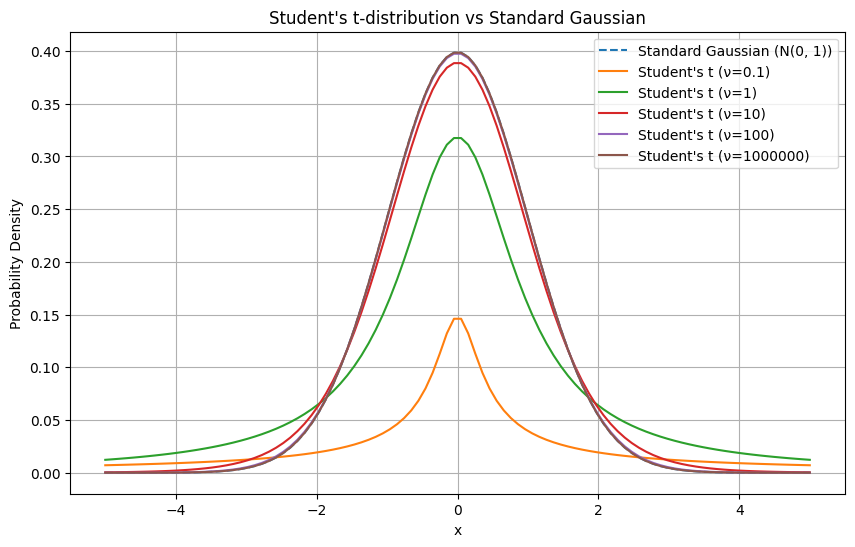

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

mu = 0
lambda_ = 1
degrees_of_freedom_values = [0.1, 1, 10, 100, 10**6]

x_values = np.linspace(-5, 5, 100)


plt.figure(figsize=(10, 6))

# Standard Gaussian distribution N(0, 1)
plt.plot(x_values, norm.pdf(x_values, mu, np.sqrt(1/lambda_)), label='Standard Gaussian (N(0, 1))', linestyle='--')

# Student's t-distributions for different degrees of freedom
for df in degrees_of_freedom_values:
    plt.plot(x_values, t.pdf(x_values, df, mu, np.sqrt(1/lambda_)), label=f'Student\'s t (ν={df})')

plt.title('Student\'s t-distribution vs Standard Gaussian')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


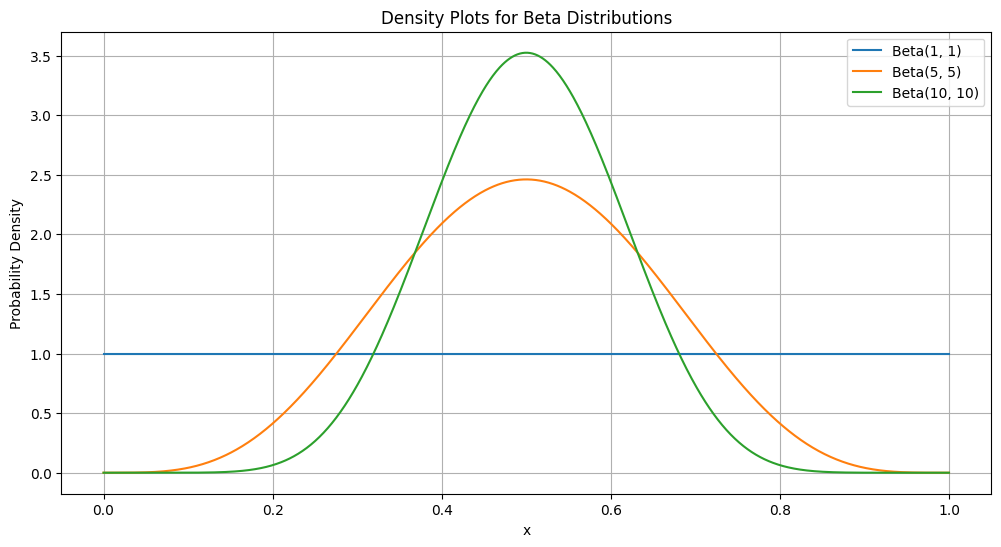

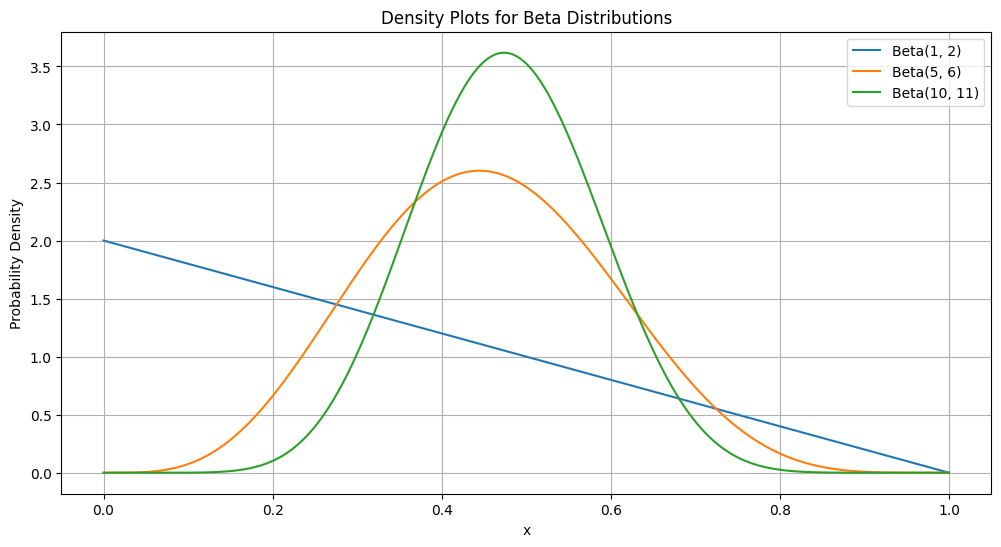

In [4]:
from scipy.stats import beta

def plot_beta(params_list, x_values = np.linspace(0, 1, 1000)):
    plt.figure(figsize=(12, 6))
    for alpha, beta_val in params_list:
        plt.plot(x_values, beta.pdf(x_values, alpha, beta_val), label=f'Beta({alpha}, {beta_val})')

    # Plot settings for the first set
    plt.title('Density Plots for Beta Distributions')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

params_set1 = [(1, 1), (5, 5), (10, 10)]
params_set2 = [(1, 2), (5, 6), (10, 11)]

plot_beta(params_list=params_set1)
plot_beta(params_list=params_set2)



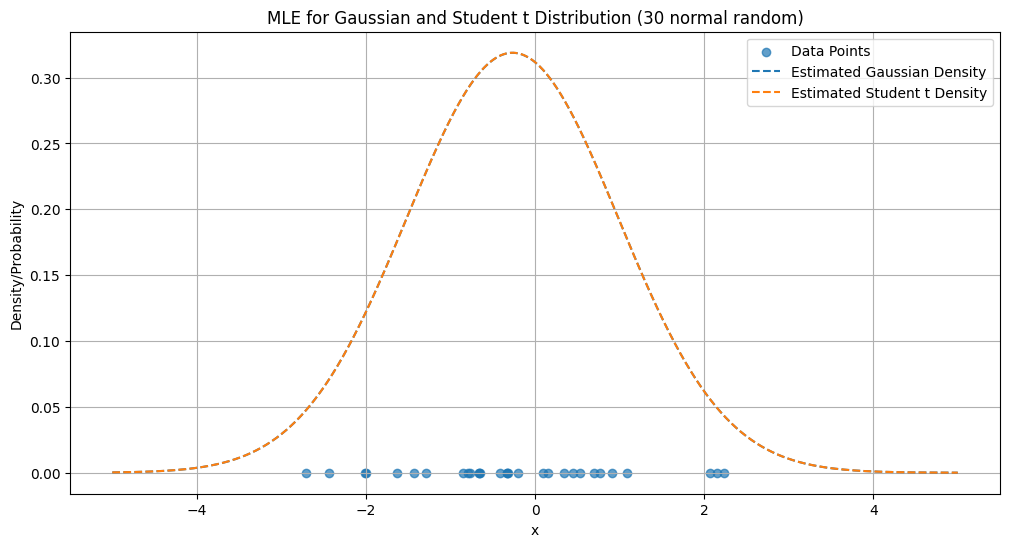

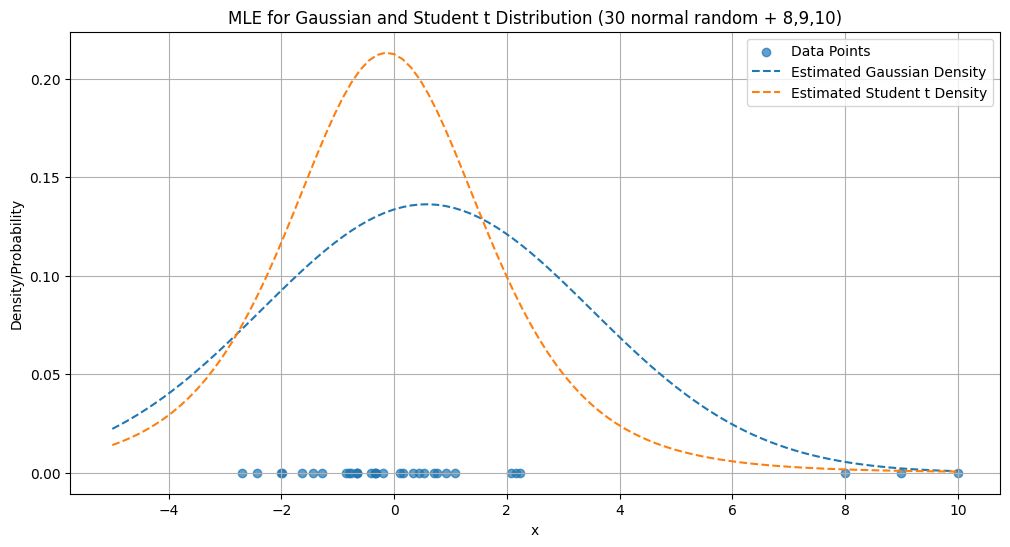

In [10]:
from scipy.optimize import minimize
np.random.seed(42)

def gaussian_neg_log_likelihood(params, data):
    mean, std = params
    return -np.sum(norm.logpdf(data, mean, std))

def student_t_neg_log_likelihood(params, data):
    mean, std, nu = params
    return -np.sum(t.logpdf(data, nu, mean, std))

# find gaussian parameters
def find_gauss_parameters(data):
    initial_guess_gaussian = [0, 1]
    result_gaussian = minimize(gaussian_neg_log_likelihood, initial_guess_gaussian, args=(data,), method='L-BFGS-B')
    mean_gaussian, std_gaussian = result_gaussian.x
    return mean_gaussian, std_gaussian

# find student t-distribution parameters
def find_t_parameters(data):
    initial_guess_student_t = [0, 1, 29]  # Initial guess for mean, std, nu
    result_student_t = minimize(student_t_neg_log_likelihood, initial_guess_student_t, args=(data,), method='L-BFGS-B')
    mean_student_t, std_student_t, nu_student_t = result_student_t.x
    return mean_student_t, std_student_t, nu_student_t


def plot_t_v_gauss(data, x_values = np.linspace(-5, 5, 1000), title='MLE for Gaussian and Student t Distribution'):
    mean_gaussian, std_gaussian = find_gauss_parameters(data=data)
    mean_student_t, std_student_t, nu_student_t = find_t_parameters(data=data)

    gaussian_density = norm.pdf(x_values, mean_gaussian, std_gaussian)
    student_t_density = t.pdf(x_values, nu_student_t, mean_student_t, std_student_t)

    plt.figure(figsize=(12, 6))
    plt.scatter(data, np.zeros_like(data), label='Data Points', alpha=0.7)
    plt.plot(x_values, gaussian_density, label='Estimated Gaussian Density', linestyle='--')
    plt.plot(x_values, student_t_density, label='Estimated Student t Density', linestyle='--')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Density/Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate 30 samples from N(0, 2)
data = np.random.normal(loc=0, scale=np.sqrt(2), size=30)
# Inject three noises: append {8, 9, 10} to the original 30 samples
data_with_noises = np.concatenate([data, [8, 9, 10]])

plot_t_v_gauss(data=data, title='MLE for Gaussian and Student t Distribution (30 normal random)')
plot_t_v_gauss(data=data_with_noises, x_values=np.linspace(-5,10,100), title='MLE for Gaussian and Student t Distribution (30 normal random + 8,9,10)')
